In [0]:
# CSE 146 Project

In [0]:
# Connect to shared CSE 146 Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Importing csv files from Google Drive 
import pandas as pd
import numpy as np

gdp_df = pd.read_csv('/content/drive/Shared drives/CSE 146/Project Materials/Datasets/gdp.csv')
happiness_2015_df = pd.read_csv('/content/drive/Shared drives/CSE 146/Project Materials/Datasets/happiness2015.csv')
happiness_2016_df = pd.read_csv('/content/drive/Shared drives/CSE 146/Project Materials/Datasets/happiness2016.csv')
happiness_2017_df = pd.read_csv('/content/drive/Shared drives/CSE 146/Project Materials/Datasets/happiness2017.csv')
happiness_2018_df = pd.read_csv('/content/drive/Shared drives/CSE 146/Project Materials/Datasets/happiness2018.csv')

In [0]:
# CLEANING DATASETS

# Removing all columns of data we are not working with from GDP dataset
# Removing column '1960-2014, 2019' in GDP dataframe as we only have happiness data from 2015-2018 
gdp_df = gdp_df.loc[:, ~gdp_df.columns.str.contains('^Unnamed|Country Code|Indicator Name|Indicator Code|1960|1961|1962|1963|1964|1965|1966|1967|1968|1969|1970|1971|1972|1973|1974|1975|1976|1977|1978|1979|1980|1981|1982|1983|1984|1985|1986|1987|1988|1989|1990|1991|1992|1993|1994|1995|1996|1997|1998|1999|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2019')]

# Removing all columns of data we are not working with from happiness dataset
# We will only be working with Total Happiness Score and GDP weight
# Ignore warning thrown
happiness_2015_df = happiness_2015_df.loc[:, ~happiness_2015_df.columns.str.contains('Region|Happiness Rank|Standard Error|Family|Health |Freedom|Trust |Social support|Freedom to make life choices|Generosity|Perceptions of corruption|Dystopia Residual')]
happiness_2016_df = happiness_2016_df.loc[:, ~happiness_2016_df.columns.str.contains('Region|Happiness Rank|Standard Error|Family|Health |Freedom|Trust |Social support|Freedom to make life choices|Generosity|Perceptions of corruption|Dystopia Residual|Lower Confidence Interval|Upper Confidence Interval')]
happiness_2017_df = happiness_2017_df.loc[:, ~happiness_2017_df.columns.str.contains('Region|Happiness.Rank|Social support|Freedom to make life choices|Generosity|Perceptions of corruption|Whisker.low|Whisker.high|Family|Health..Life.Expectancy.|Freedom|Trust..Government.Corruption.|Dystopia.Residual')]
happiness_2018_df = happiness_2018_df.loc[:, ~happiness_2018_df.columns.str.contains('Region|Overall rank|Social support|Freedom to make life choices|Generosity|Perceptions of corruption|Standard Error|Family|Health (Life Expectancy)|Freedom|Trust (Government Corruption)|Healthy life expectancy')]

# Rename columns for consistency
# Happiness = Total Happiness Score
# GDP = GDP weight (how a countries see the GDP per capita contribute to happiness)
colnames = [ "Country", "Happiness", "GDP"]
happiness_2015_df.columns = colnames
happiness_2016_df.columns = colnames
happiness_2017_df.columns = colnames
happiness_2018_df.columns = colnames

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [0]:
# CLEANING DATASETS (CONT.) 
# Removing countries that don't appear in all four happiness datasets

# Storing all the Country Names in Happiness 2015 dataset into a list
temp_arr = happiness_2015_df["Country"].unique()
mylist1 = [] 
for x in temp_arr:
  mylist1.append(x)

# Storing all the Country Names in Happiness 2016 dataset into a list
temp_arr = happiness_2016_df["Country"].unique()
mylist2 = [] 
for x in temp_arr:
  mylist2.append(x)

# Storing all the Country Names in Happiness 2017 dataset into a list
temp_arr = happiness_2017_df["Country"].unique()
mylist3 = [] 
for x in temp_arr:
  mylist3.append(x)

# Storing all the Country Names in Happiness 2017 dataset into a list
temp_arr = happiness_2018_df["Country"].unique()
mylist4 = [] 
for x in temp_arr:
  mylist4.append(x)

# Creating a new empty list to cross check all four
diff = []

# Appends countries that dont appear in both lists
# Ex: listA = [A, B, C] - listB = [A, B, D] => [C]
diff.append(list(set(mylist1) - set(mylist2)))
diff.append(list(set(mylist1) - set(mylist3)))
diff.append(list(set(mylist1) - set(mylist4)))
diff.append(list(set(mylist2) - set(mylist1)))
diff.append(list(set(mylist3) - set(mylist1)))
diff.append(list(set(mylist4) - set(mylist1)))

# Flattens the list and gets rid of repeating countries
# Before = [[A],[B],[D],[D]], After = [A, B, D]
# Delete Countries List
delCountries = set([val for sublist in diff for val in sublist])

# Changes it from a set to list, for preference reasons only
delCountries = list(delCountries)
delCountries.sort()

# Sets do not match each other at this point.
# Printing out shape of each set to confirm.
print(happiness_2015_df.shape, happiness_2016_df.shape, happiness_2017_df.shape, happiness_2018_df.shape)

# Modifying the Happiness dataframe to only keep countries that aren't in the Delete Country list
for c in delCountries:
  happiness_2015_df = happiness_2015_df[happiness_2015_df.Country != str(c)]
  happiness_2016_df = happiness_2016_df[happiness_2016_df.Country != str(c)]
  happiness_2017_df = happiness_2017_df[happiness_2017_df.Country != str(c)]
  happiness_2018_df = happiness_2018_df[happiness_2018_df.Country != str(c)]

# Sets should match each other at this point.
# Printing out shape of each set to confirm.
print(happiness_2015_df.shape, happiness_2016_df.shape, happiness_2017_df.shape, happiness_2018_df.shape, '\n')

# for c in delCountries:
#   print(c, '\n')

(158, 3) (157, 3) (155, 3) (156, 3)
(148, 3) (148, 3) (148, 3) (148, 3) 



In [0]:
# CLEANING DATASETS (CONT.) 
# Cleaning GDP dataset to match the Happiness datasets

# Originally the GDP dataset has 264 unique countries in it
print(len(gdp_df["Country Name"].unique()))

# Only keeping the countries in GDP that are found in the Happiness dataframe
gdp_df = gdp_df[gdp_df['Country Name'].isin(happiness_2015_df.Country)]
print(len(gdp_df["Country Name"].unique()))

# Storing all the Country Names in Happiness 2015 dataframe into a list
temp_arr = happiness_2015_df["Country"].unique()
mylist1 = [] 
for x in temp_arr:
  mylist1.append(x)

# Storing all the Country Names in GDP dataset into a list
temp_arr = gdp_df["Country Name"].unique()
mylist2 = [] 
for x in temp_arr:
  mylist2.append(x)

# At this point Happiness dataframe has more countries than the GDP dataframe
# To fix this, we will elimate the countries in the Happiness dataframe that don't appear in GDP dataframe


# Creating a new empty list to cross check GDP dataframe and Happiness dataframe
diff2 = []

# Appends countries that dont appear in both lists
# Ex: listA = [A, B, C] - listB = [A, B, D] => [C]
diff2.append(list(set(mylist1) - set(mylist2)))
diff2.append(list(set(mylist1) - set(mylist2)))

# Flattens the list and gets rid of repeating countries
# Before = [[A],[B],[D],[D]], After = [A, B, D]
# Delete Countries List
delCountries = set([val for sublist in diff2 for val in sublist])
delCountries = list(delCountries)
delCountries.sort()
delCountries

# Number of countries in each dataframe before deleting the countries that appear in all five dataframes
print(happiness_2015_df.shape, happiness_2016_df.shape, happiness_2017_df.shape, happiness_2018_df.shape, gdp_df.shape)

# Modifying the Happiness dataframe again, to only keep countries that aren't in the Delete Country list
for c in delCountries:
  happiness_2015_df = happiness_2015_df[happiness_2015_df.Country != str(c)]
  happiness_2016_df = happiness_2016_df[happiness_2016_df.Country != str(c)]
  happiness_2017_df = happiness_2017_df[happiness_2017_df.Country != str(c)]
  happiness_2018_df = happiness_2018_df[happiness_2018_df.Country != str(c)]

# At this point all five dataframes should have the same countries 
print(happiness_2015_df.shape, happiness_2016_df.shape, happiness_2017_df.shape, happiness_2018_df.shape, gdp_df.shape)

264
131
(148, 3) (148, 3) (148, 3) (148, 3) (131, 5)
(131, 3) (131, 3) (131, 3) (131, 3) (131, 5)


In [0]:
# At this point the dataframes indices are not matching 
# Happiness dataframe is initially sorted by total happiness score
# GDP dataframe is sorted alphabetically by country name code
print(gdp_df['Country Name'])
print(happiness_2015_df['Country'])

1               Afghanistan
2                    Angola
3                   Albania
6      United Arab Emirates
7                 Argentina
               ...         
255                 Vietnam
259                  Kosovo
261            South Africa
262                  Zambia
263                Zimbabwe
Name: Country Name, Length: 131, dtype: object
0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
152    Afghanistan
153         Rwanda
154          Benin
156        Burundi
157           Togo
Name: Country, Length: 131, dtype: object


In [0]:
# We have decided to sort all dataframes alphabetically by Country
gdp_df = gdp_df.sort_values(by=['Country Name'])
happiness_2015_df = happiness_2015_df.sort_values(by=['Country'])
happiness_2016_df = happiness_2016_df.sort_values(by=['Country'])
happiness_2017_df = happiness_2017_df.sort_values(by=['Country'])
happiness_2018_df = happiness_2018_df.sort_values(by=['Country'])

# Printing to double check
print(gdp_df['Country Name'])
print(happiness_2015_df['Country'])

1      Afghanistan
3          Albania
58         Algeria
2           Angola
7        Argentina
          ...     
248        Uruguay
250     Uzbekistan
255        Vietnam
262         Zambia
263       Zimbabwe
Name: Country Name, Length: 131, dtype: object
152    Afghanistan
94         Albania
67         Algeria
136         Angola
29       Argentina
          ...     
31         Uruguay
43      Uzbekistan
74         Vietnam
84          Zambia
114       Zimbabwe
Name: Country, Length: 131, dtype: object


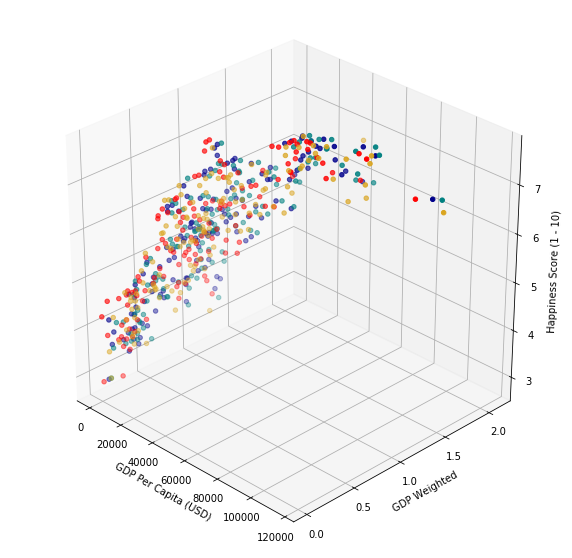

In [0]:
# Plotting in a 3d plane the GDP per capital, GDP weight, Total Happiness Score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Makes the figure bigger
plt.rcParams["figure.figsize"]=10,10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting for the year 2015
X15 = [gdp_df['2015']]
Y15 = [happiness_2015_df['GDP']]
Z15 = [happiness_2015_df['Happiness']]

# Plotting for the year 2016
X16 = [gdp_df['2016']]
Y16 = [happiness_2016_df['GDP']]
Z16 = [happiness_2016_df['Happiness']]

# Plotting for the year 2017
X17 = [gdp_df['2017']]
Y17 = [happiness_2017_df['GDP']]
Z17 = [happiness_2017_df['Happiness']]

# Plotting for the year 2018
X18 = [gdp_df['2018']]
Y18 = [happiness_2018_df['GDP']]
Z18 = [happiness_2018_df['Happiness']]

# Year 2015 is represented in the color red
# Year 2016 is represented in the color dark blue
# Year 2017 is represented in the color teal
# Year 2018 is represented in the color golden rod
ax.scatter(X15, Y15, Z15, c='red', marker='o')
ax.scatter(X16, Y16, Z16, c='darkblue', marker='o')
ax.scatter(X17, Y17, Z17, c='teal', marker='o')
ax.scatter(X18, Y18, Z18, c='goldenrod', marker='o')

ax.set_xlabel('GDP Per Capita (USD)')
ax.set_ylabel('GDP Weighted')
ax.set_zlabel('Happiness Score (1 - 10)')

ax.view_init(azim=-45)

plt.show()

In [0]:
# SORT BY GDP #############################################################
# The following is being sorted by GDP per capita to be plotted in a 2d plane

# Sort by Weight GDP of 2018 ##############################################
sorted_df_2018_gdp = gdp_df.copy()                                              # Making a copy to not modify the original GDP dataframe
sorted_df_2018_gdp = sorted_df_2018_gdp.reset_index(drop=True)                  # Resetting indices, important for sorting later 

sorted_df_2018_happiness = happiness_2018_df.copy()                             # Making a copy to not modify the original Happiness 2018 dataframe
sorted_df_2018_happiness = sorted_df_2018_happiness.reset_index(drop=True)      # Resetting indices, important for sorting later 

sorted_df_2018_gdp = sorted_df_2018_gdp.sort_values(by='2018')                  # GDP dataframe contains the GDP per capita, so we will be sorting here

copy_column = sorted_df_2018_gdp['2018']                                        # Making a copy of the countries in GDP dataframe that is now sorted by GDP per capita

sorted_df_2018_happiness = sorted_df_2018_happiness.join(copy_column)           # Append copy to Happiness dataframe

sorted_df_2018_happiness = sorted_df_2018_happiness.sort_values(by='2018')      # Happiness dataframe can now be sorted
                                                                                # *Rest indices allows the dataframe to be sorted corrected.
# ############################################################################

# Sort by Weight GDP of 2017 ##############################################
sorted_df_2017_gdp = gdp_df.copy()                                              # Same procedure but for 2017
sorted_df_2017_gdp = sorted_df_2017_gdp.reset_index(drop=True)

sorted_df_2017_happiness = happiness_2017_df.copy()
sorted_df_2017_happiness = sorted_df_2017_happiness.reset_index(drop=True)

sorted_df_2017_gdp = sorted_df_2017_gdp.sort_values(by='2017')

copy_column = sorted_df_2017_gdp['2017']

sorted_df_2017_happiness = sorted_df_2017_happiness.join(copy_column)

sorted_df_2017_happiness = sorted_df_2017_happiness.sort_values(by='2017')
# ############################################################################

# # Sort by Weight GDP of 2016 ##############################################
sorted_df_2016_gdp = gdp_df.copy()                                              # Same procedure but for 2016
sorted_df_2016_gdp = sorted_df_2016_gdp.reset_index(drop=True)

sorted_df_2016_happiness = happiness_2016_df.copy()
sorted_df_2016_happiness = sorted_df_2016_happiness.reset_index(drop=True)

sorted_df_2016_gdp = sorted_df_2016_gdp.sort_values(by='2016')

copy_column = sorted_df_2016_gdp['2016']

sorted_df_2016_happiness = sorted_df_2016_happiness.join(copy_column)

sorted_df_2016_happiness = sorted_df_2016_happiness.sort_values(by='2016')

# Sort by Weight GDP of 2015 ##############################################
sorted_df_2015_gdp = gdp_df.copy()                                              # Same procedure but for 2015
sorted_df_2015_gdp = sorted_df_2015_gdp.reset_index(drop=True)

sorted_df_2015_happiness = happiness_2015_df.copy()
sorted_df_2015_happiness = sorted_df_2015_happiness.reset_index(drop=True)

sorted_df_2015_gdp = sorted_df_2015_gdp.sort_values(by='2015')

copy_column = sorted_df_2015_gdp['2015']

sorted_df_2015_happiness = sorted_df_2015_happiness.join(copy_column)

sorted_df_2015_happiness = sorted_df_2015_happiness.sort_values(by='2015')

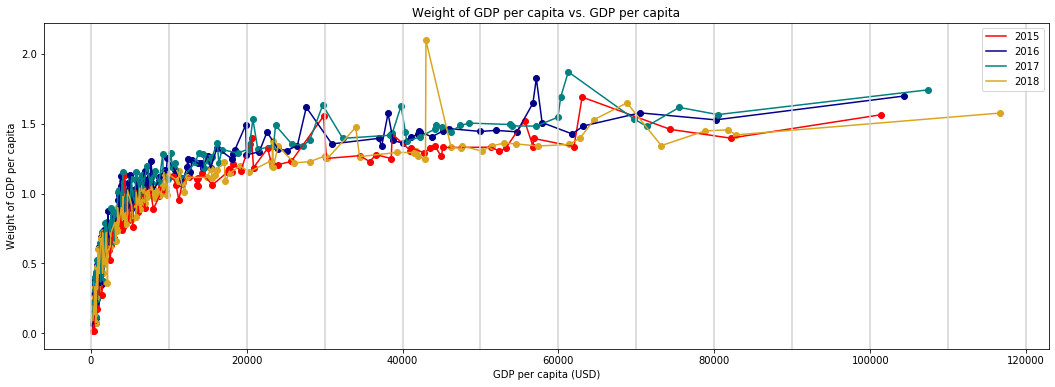

In [0]:
# Plotting weight of GPD and GPD per capita for each country
# Sorted by GDP per capita

# Makes the figure longer
plt.figure(figsize=(18,6))

x_label = 'GDP per capita (USD)'
y_label = 'Weight of GDP per capita'
plt.title('Weight of GDP per capita vs. GDP per capita')
plt.xlabel(x_label)
plt.ylabel(y_label)


# Lines and points are included 
plt.plot(sorted_df_2015_gdp['2015'], sorted_df_2015_happiness['GDP'], color='red', label='2015')
plt.plot(sorted_df_2016_gdp['2016'], sorted_df_2016_happiness['GDP'], color='darkblue', label='2016')
plt.plot(sorted_df_2017_gdp['2017'], sorted_df_2017_happiness['GDP'], color='teal', label='2017')
plt.plot(sorted_df_2018_gdp['2018'], sorted_df_2018_happiness['GDP'], color='goldenrod', label='2018')

plt.scatter(sorted_df_2015_gdp['2015'], sorted_df_2015_happiness['GDP'], color='red')
plt.scatter(sorted_df_2016_gdp['2016'], sorted_df_2016_happiness['GDP'], color='darkblue')
plt.scatter(sorted_df_2017_gdp['2017'], sorted_df_2017_happiness['GDP'], color='teal')
plt.scatter(sorted_df_2018_gdp['2018'], sorted_df_2018_happiness['GDP'], color='goldenrod')



# Draws vertical lines at each 10,000 mark to help with analysis
for lines in range(0, 120001, 10000):
  plt.axvline(x=lines, color='lightgrey')

plt.legend()
plt.show()

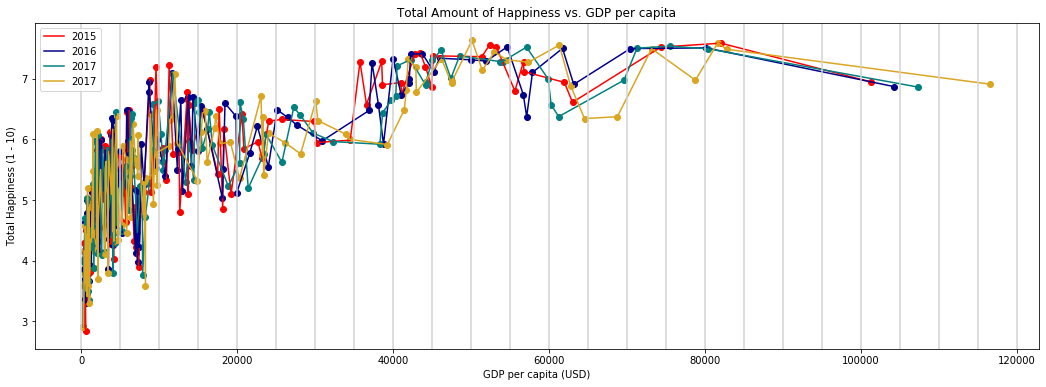

In [0]:
# Plotting Total Happiness Score and GPD per capita for each country
# Sorted by GDP per capita

# Makes the figure longer
plt.figure(figsize=(18,6))

x_label = 'GDP per capita (USD)'
y_label = 'Total Happiness (1 - 10)'
plt.title('Total Amount of Happiness vs. GDP per capita')
plt.xlabel(x_label)
plt.ylabel(y_label)

# Lines and points are included 
plt.plot(sorted_df_2015_gdp['2015'], sorted_df_2015_happiness['Happiness'], color='red', label='2015')
plt.plot(sorted_df_2016_gdp['2016'], sorted_df_2016_happiness['Happiness'], color='darkblue', label='2016')
plt.plot(sorted_df_2017_gdp['2017'], sorted_df_2017_happiness['Happiness'], color='teal', label='2017')
plt.plot(sorted_df_2018_gdp['2018'], sorted_df_2018_happiness['Happiness'], color='goldenrod', label='2017')

plt.scatter(sorted_df_2015_gdp['2015'], sorted_df_2015_happiness['Happiness'], color='red')
plt.scatter(sorted_df_2016_gdp['2016'], sorted_df_2016_happiness['Happiness'], color='darkblue')
plt.scatter(sorted_df_2017_gdp['2017'], sorted_df_2017_happiness['Happiness'], color='teal')
plt.scatter(sorted_df_2018_gdp['2018'], sorted_df_2018_happiness['Happiness'], color='goldenrod')

# Draws vertical lines at each 5,000 mark to help with analysis
for lines in range(0, 120001, 5000):
  plt.axvline(x=lines, color='lightgrey')

# Draws horizontal lines at each 0.5 mark to help with analysis 
# for lines in np.arange(2, 8, .5):
#   plt.axhline(y = lines, color='lightgrey')

plt.legend()
plt.show()

In [0]:
# SORT BY Total Happiness Score ################################################
# The following is being sorted by total happiness score to be plotted in a 2d plane


# Sorting x-axis from lowest to highest total happiness of 2018 ##############
sorted_df_2018_happiness = happiness_2018_df.copy()                             # Making a copy to not modify the original 2018 Happiness dataframe
sorted_df_2018_happiness = sorted_df_2018_happiness.reset_index(drop=True)      # Resetting indices, important for sorting later

sorted_df_2018_gdp = gdp_df.copy()                                              # Making a copy to not modify the original GDP dataframe
sorted_df_2018_gdp = sorted_df_2018_gdp.reset_index(drop=True)                  # Resetting indices, important for sorting later

sorted_df_2018_happiness

sorted_df_2018_happiness = sorted_df_2018_happiness.sort_values(by='Happiness') # Happiness dataframe contains the total happiness score, so we will be sorting here

copy_column = sorted_df_2018_happiness['Happiness']                             # Making a copy of the countries in Happiness dataframe that is now sorted by total happiness score

sorted_df_2018_gdp = sorted_df_2018_gdp.join(copy_column)                       # Append copy to GDP dataframe

sorted_df_2018_gdp = sorted_df_2018_gdp.sort_values(by='Happiness')             # GDP dataframe can now be sorted
                                                                                # *Rest indices allows the dataframe to be sorted corrected.
##############################################################################

# Sorting x-axis from lowest to highest total happiness of 2017 ##############
sorted_df_2017_happiness = happiness_2017_df.copy()                             # Same procedure but for 2017
sorted_df_2017_happiness = sorted_df_2017_happiness.reset_index(drop=True)

sorted_df_2017_gdp = gdp_df.copy()
sorted_df_2017_gdp = sorted_df_2017_gdp.reset_index(drop=True)

sorted_df_2017_happiness

sorted_df_2017_happiness = sorted_df_2017_happiness.sort_values(by='Happiness')

copy_column = sorted_df_2017_happiness['Happiness']

sorted_df_2017_gdp = sorted_df_2017_gdp.join(copy_column)

sorted_df_2017_gdp = sorted_df_2017_gdp.sort_values(by='Happiness')
##############################################################################

# Sorting x-axis from lowest to highest total happiness of 2016 ##############
sorted_df_2016_happiness = happiness_2016_df.copy()                             # Same procedure but for 2016
sorted_df_2016_happiness = sorted_df_2016_happiness.reset_index(drop=True)

sorted_df_2016_gdp = gdp_df.copy()
sorted_df_2016_gdp = sorted_df_2016_gdp.reset_index(drop=True)

sorted_df_2016_happiness = sorted_df_2016_happiness.sort_values(by='Happiness')

copy_column = sorted_df_2016_happiness['Happiness']

sorted_df_2016_gdp = sorted_df_2016_gdp.join(copy_column)

sorted_df_2016_gdp = sorted_df_2016_gdp.sort_values(by='Happiness')
##############################################################################
# Sorting x-axis from lowest to highest total happiness of 2015 ##############
sorted_df_2015_happiness = happiness_2015_df.copy()                             # Same procedure but for 2015
sorted_df_2015_happiness = sorted_df_2015_happiness.reset_index(drop=True)

sorted_df_2015_gdp = gdp_df.copy()
sorted_df_2015_gdp = sorted_df_2015_gdp.reset_index(drop=True)

sorted_df_2015_happiness = sorted_df_2015_happiness.sort_values(by='Happiness')

copy_column = sorted_df_2015_happiness['Happiness']

sorted_df_2015_gdp = sorted_df_2015_gdp.join(copy_column)

sorted_df_2015_gdp = sorted_df_2015_gdp.sort_values(by='Happiness')

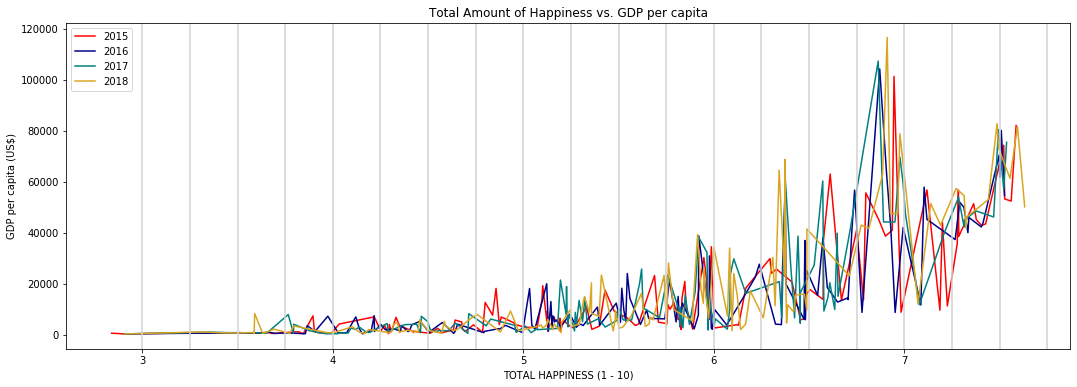

In [0]:
# Plotting total happiness score and GPD per capita for each country
# Sorted by total happiness score

# Makes the figure longer
plt.figure(figsize=(18,6))

x_label = 'TOTAL HAPPINESS (1 - 10)'
y_label = 'GDP per capita (US$)'
plt.title('Total Amount of Happiness vs. GDP per capita')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.plot(sorted_df_2015_happiness['Happiness'], sorted_df_2015_gdp['2015'], color='red', label='2015')
plt.plot(sorted_df_2016_happiness['Happiness'], sorted_df_2016_gdp['2016'], color='darkblue', label='2016')
plt.plot(sorted_df_2017_happiness['Happiness'], sorted_df_2017_gdp['2017'], color='teal', label='2017')
plt.plot(sorted_df_2018_happiness['Happiness'], sorted_df_2018_gdp['2018'], color='goldenrod', label='2018')

# Draws vertical lines at each 0.25 mark to help with analysis
for lines in np.arange(3, 8, .25):
  plt.axvline(x=lines, color='lightgrey')

# Draws horizontal lines at each 10,000 mark to help with analysis 
# for lines in np.arange(0, 120001, 10000):
#   plt.axhline(y = lines, color='lightgrey')

plt.legend()
plt.show()

In [0]:
# Attempt to fixing train model using a small subset of the data 
# First we determine what the average is for total happiness per year

happiness_2015_df['Happiness'].describe() # The mean for total happiness in 2015 is 5.453954
h_15_threshold = 5.453954

happiness_2016_df['Happiness'].describe() # The mean for total happiness in 2016 is 5.443443
h_16_threshold = 5.443443

happiness_2017_df['Happiness'].describe() # The mean for total happiness in 2017 is 5.454275
h_17_threshold = 5.454275

happiness_2018_df['Happiness'].describe() # The mean for total happiness in 2018 is 5.490321
h_18_threshold = 5.490321


# We take all the averages and divided by 4 
# This will be our threshold to determine which countries are happier countries and which are 
# unhappier countries
h_all_threshold = (h_15_threshold + h_16_threshold + h_17_threshold + h_18_threshold)/4
print(h_all_threshold)

5.4604982500000006


In [0]:
# We will be applying our threshold to improve our model

# Countries with a total happiness score greater than or equal to mean will be considered good (happier)
# Countries with a total happiness score less than the mean will be considered bad (unhappier)

def happy_threshold(y_values, threshold):
  """
  Returns a list with 0s or 1s in it.
  Appends 1 to the list if the total happiness score >= threshold
  Appends 0 to the list if the total happiness score < threshold
  """
  mylist = []
  for value in y_values:
    if value >= threshold:
      mylist.append(1)
    else:
      mylist.append(0)
  return mylist


In [0]:
# TRAINING AND TESTING ON 2015 DATA
from sklearn.linear_model import LinearRegression

# Using only the data from 2015 

# GDP Dataframe from 2015
dataX = gdp_df['2015']
# 2015 Happiness Dataframe
dataY = happiness_2015_df['Happiness']

# Split the training and testing set 0-90 & 91-131
dataX_train = dataX[0:90]
dataY_train = dataY[0:90]

dataX_test = dataX[90:]
dataY_test = dataY[90:]

# Reshaped dataframe into numpy array
dataX_train = np.array(dataX_train).reshape(-1, 1)
dataY_train = np.array(dataY_train).reshape(-1, 1)
dataX_test = np.array(dataX_test).reshape(-1, 1)
dataY_test = np.array(dataY_test).reshape(-1, 1)

# Trained model on traing set
linreg = LinearRegression().fit(dataX_train, dataY_train)

# Used trained modeld to predict on test set
# Predictions are not binary
y_hat_score = linreg.predict(dataX_test)

# Applying the threshold function to produce binary results
# 0 = unhappier country, 1 = happier country
y_hat_score_threshold = happy_threshold(y_hat_score, h_15_threshold)
dataY_test_threshold = happy_threshold(dataY_test, h_15_threshold)


In [0]:
# ERROR FUNCTION:
def error(y_hat, y_data):
  """
  Returns the perctange it got wrong
  """
  count = 0
  for i in range(len(y_hat)):
    if y_hat[i] != y_data[i]:
      count += 1
  return count / len(y_hat)


In [0]:
# Printing out error rate and accuracy rate
error_rate = error(y_hat_score_threshold, dataY_test_threshold)
accuracy_rate = 1 - error_rate

print(y_hat_score_threshold)
print(dataY_test_threshold)
print('Error rate in y_hat and dataY:', '{:05.2f}'.format(error_rate*100), "%")
print('Accuracy rate: ', '{:05.2f}'.format(accuracy_rate*100), "%")

[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Error rate in y_hat and dataY: 19.51 %
Accuracy rate:  80.49 %


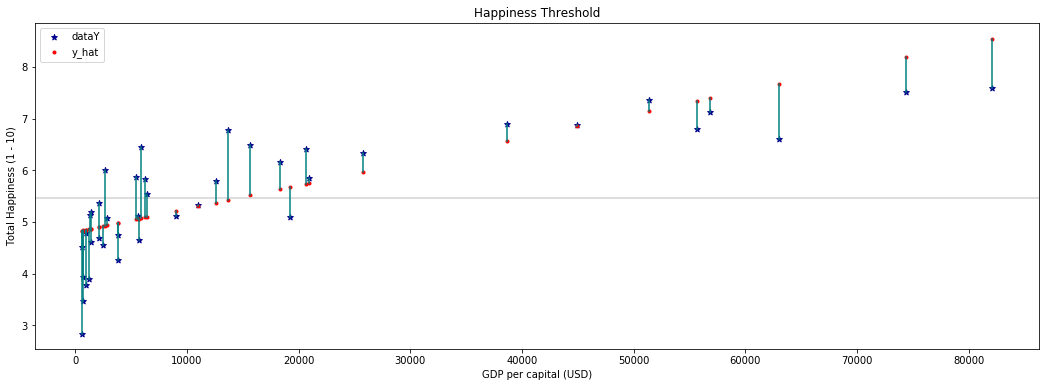

In [0]:
# Plotting y values = predict score and actual score
# X values = remain the same, GDP per capita

# Makes the figure longer
plt.figure(figsize=(18,6))

x_label = 'GDP per capital (USD)'
y_label = 'Total Happiness (1 - 10)'
plt.title('Happiness Threshold')
plt.xlabel(x_label)
plt.ylabel(y_label)

# Storing all x values in an "array"
x_array = dataX_test

# Storing y values in "arrays"
y_correct_array = dataY_test_threshold
y_prediction_array = y_hat_score_threshold

# Dark blue will represent actual score
# Red will represent predicted score
plt.scatter(x_array, dataY_test, color='darkblue', label='dataY', marker='*')
plt.scatter(x_array, y_hat_score, color='red', label='y_hat', marker='.')

# Draws the horizontal line of the total happiness score average of the year 2015
# Line is the mean/threshold
plt.axhline(y = h_15_threshold, color='lightgrey')

# Draws a line connecting the actual total happiness score to the predicted score
# Connecting vertical lines that cross the horizontal line are incorrect predictions
for i in range(len(x_array)):
  x = [x_array[i], x_array[i]]
  y = [dataY_test[i], y_hat_score[i]]
  plt.plot(x, y, color='teal')
  
   
plt.legend()
plt.show()

# END of attempt to fixing train model using a small subset of the data ########

In [0]:
# After coming up with a solution to our problem
# We will apply it to the entire dataset

# TRAINING LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# Splitting dataset 75/25
# We will train on 3 years and test on 1 year

# Combining 2015, 2016, 2017 columns into one Dataframe
dataXTrain = pd.DataFrame()
dataXTrain = gdp_df['2015']
dataXTrain = dataXTrain.append(gdp_df['2016'])
dataXTrain = dataXTrain.append(gdp_df['2017'])

# Transforming dataframe into numpy array and reshaping from training
arrXTrain = np.array(dataXTrain).reshape(-1, 1)

# Combining 2015, 2016, 2017 dataframes into one Dataframe
dataYTrain = happiness_2015_df['Happiness']
dataYTrain = dataYTrain.append(happiness_2016_df['Happiness'])
dataYTrain = dataYTrain.append(happiness_2017_df['Happiness'])

# Transforming dataframe into numpy array and reshaping from training
arrYTrain = np.array(dataYTrain).reshape(-1, 1)

# Storing test set into dataframe 
dataXTest = gdp_df['2018']

# Transforming dataframe into numpy array and reshaping from testing
arrXTest = np.array(dataXTest).reshape(-1, 1)

# Storing test set into dataframe 
dataYTest = happiness_2018_df['Happiness']

# Transforming dataframe into numpy array and reshaping from testing
arrYTest = np.array(dataYTest).reshape(-1, 1)

# Trained model on 3 years 
linreg = LinearRegression().fit(arrXTrain, arrYTrain)
# Used trained model to predict 4th year
# Currently not binary
y_hat_score = linreg.predict(arrXTest)

# Applying the threshold function to produce binary results
# 0 = unhappier country, 1 = happier country
y_hat_score_threshold = happy_threshold(y_hat_score, h_all_threshold)
arrYTest_threshold = happy_threshold(arrYTest, h_all_threshold)

In [0]:
# Printing out error rate and accuracy rate
error_rate = error(y_hat_score_threshold, arrYTest_threshold)
accuracy_rate = 1 - error_rate

print(y_hat_score_threshold)
print(arrYTest_threshold)
print('Error rate in y_hat and dataY:', '{:05.2f}'.format(error_rate*100), "%")
print('Accuracy rate: ', '{:05.2f}'.format(accuracy_rate*100), "%")

[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Error rate in y_hat and dataY: 22.90 %
Accuracy rate:  77.10 %


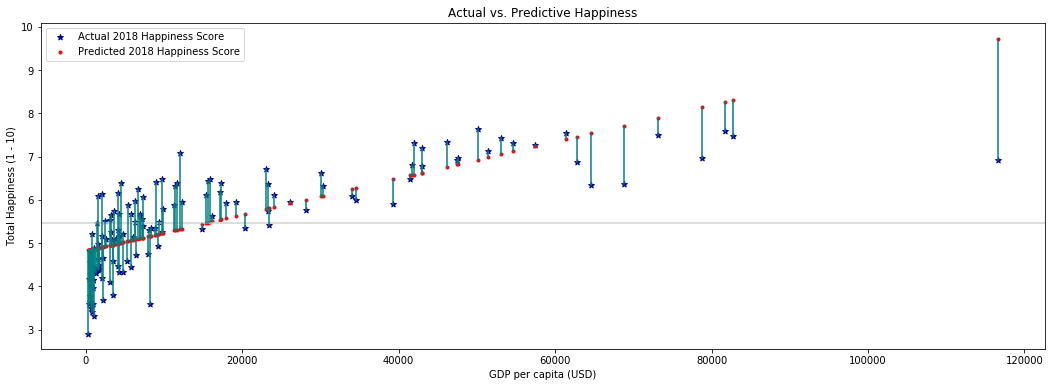

In [0]:
# Plotting y values = predict score and actual score
# X values = remain the same, GDP per capita

# Makes the figure longer
plt.figure(figsize=(18,6))

x_label = 'GDP per capita (USD)'
y_label = 'Total Happiness (1 - 10)'
plt.title('Actual vs. Predictive Happiness')
plt.xlabel(x_label)
plt.ylabel(y_label)

# Storing all x values in an "array"
x_array = arrXTest

# Storing all y values in an "arrays"
y_correct_array = arrYTest
y_prediction_array = y_hat_score

# Dark blue will represent actual score
# Red will represent predicted score
plt.scatter(x_array, y_correct_array, color='darkblue', label='Actual 2018 Happiness Score', marker='*')
plt.scatter(x_array, y_prediction_array, color='red', label='Predicted 2018 Happiness Score', marker='.')

# Draws the horizontal line of the total happiness score average of all four years
# Line is the mean/threshold = 5.4604982500000006
plt.axhline(y = h_all_threshold, color='lightgrey')

# Draws a line connecting the actual total happiness score to the predicted score
# Connecting vertical lines that cross the horizontal line are incorrect predictions
for i in range(len(x_array)):
  x = [x_array[i], x_array[i]]
  y = [arrYTest[i], y_hat_score[i]]
  plt.plot(x, y, color='teal')
  
   
plt.legend()
plt.show()